In [1]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=1000)


# прямое кодирование списков в векторы нулей и единиц. Это может
# означать, например, преобразование последовательности [3, 5] в 10 000-мерный
# вектор, все элементы которого содержат нули, кроме элементов с индексами
# 3 и 5, которые содержат единицы

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1  # Запись единицы в элемент с данным индексом
    return results


# Входные данные в нейросети должны быть векторами
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')  # векторизировать метки проще
y_test = np.asarray(test_labels).astype('float32')

# Входные данные представлены векторами, а метки — скалярами (единицами и нулями): это самый простой набор данных, какой можно встретить. С задачами этого
# вида прекрасно справляются сети, организованные как простой стек полносвязных
# (Dense) слоев с операцией активации relu: Dense(16, activation='relu')

from keras import models
from keras import layers

# Создание модели
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#Создание проверочного набора
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#обучение модели
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy', # функция потерь
              metrics=['acc']) # отслеживаемая метрика
history = model.fit(partial_x_train,
             partial_y_train,
             epochs=20,
             batch_size=512,
             validation_data=(x_val, y_val))



<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
C:\PROGRAMMS\PYTHON\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\PROGRAMMS\PYTHON\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do t

Epoch 1/20
30/30 [==============================] - 4s 128ms/step - loss: 0.5856 - acc: 0.7555 - val_loss: 0.4776 - val_acc: 0.8317
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.4228 - acc: 0.8403 - val_loss: 0.3932 - val_acc: 0.8403
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3571 - acc: 0.8602 - val_loss: 0.3585 - val_acc: 0.8502
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3309 - acc: 0.8659 - val_loss: 0.3388 - val_acc: 0.8580
Epoch 5/20
30/30 [==============================] - 1s 30ms/step - loss: 0.3163 - acc: 0.8704 - val_loss: 0.3433 - val_acc: 0.8562
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3050 - acc: 0.8755 - val_loss: 0.3419 - val_acc: 0.8577
Epoch 7/20
30/30 [==============================] - 1s 29ms/step - loss: 0.3004 - acc: 0.8769 - val_loss: 0.3809 - val_acc: 0.8420
Epoch 8/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3001 - 

Обратите внимание на то, что вызов model.fit() возвращает объект History. 
Этот объект имеет поле history — словарь с данными обо всем происходившем 
в процессе обучения. Заглянем в него:

In [2]:
history_dict = history.history
history_dict.keys()
# Словарь содержит по одному элементу на метрику

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

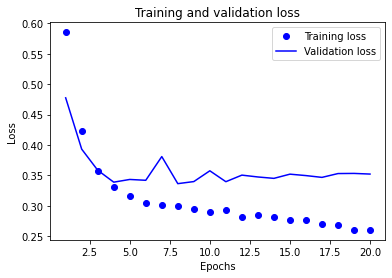

In [5]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss') # bo - blue dot
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') # b-solid blue line

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

Формирование графиков точности на этапах обучения и проверки:

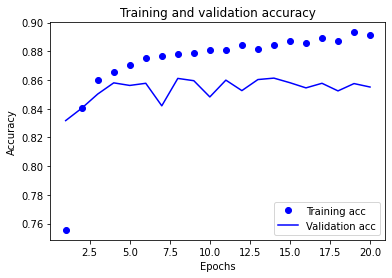

In [18]:
plt.clf() #Очистить рисунок

acc_values = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc_values , 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# Видно, что после 4 эпохи наблюдается переобучение

In [19]:
# Прошлая сеть для сравнения:
'''
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy', # функция потерь
              metrics=['acc']) # отслеживаемая метрика
history = model.fit(partial_x_train,
             partial_y_train,
             epochs=20,
             batch_size=512,
             validation_data=(x_val, y_val))
'''

# Обучение новой модели с нуля
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
49/49 [==============================] - 1s 26ms/step - loss: 0.5312 - accuracy: 0.7901
Epoch 2/4
49/49 [==============================] - 1s 17ms/step - loss: 0.3748 - accuracy: 0.8537
Epoch 3/4
49/49 [==============================] - 1s 16ms/step - loss: 0.3303 - accuracy: 0.8636
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.3382 - accuracy: 0.8570


[0.33821752667427063, 0.8569999933242798]

ПРЕДСКАЗАНИЯ: 

In [20]:
model.predict(x_test)

array([[0.40458363],
       [0.9949441 ],
       [0.6961224 ],
       ...,
       [0.12660018],
       [0.15312487],
       [0.49670088]], dtype=float32)